In [582]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [649]:
data = pd.read_csv('results.csv')

In [650]:
data.tail

<bound method NDFrame.tail of        resultId  raceId  driverId  constructorId  number  grid  position  \
0             1      18         1              1    22.0     1       1.0   
1             2      18         2              2     3.0     5       2.0   
2             3      18         3              3     7.0     7       3.0   
3             4      18         4              4     5.0    11       4.0   
4             5      18         5              1    23.0     3       5.0   
...         ...     ...       ...            ...     ...   ...       ...   
23772     23777     988       842              5    10.0    17      16.0   
23773     23778     988       828             15     9.0    19      17.0   
23774     23779     988       840              3    18.0    15      18.0   
23775     23780     988       832              4    55.0    12       NaN   
23776     23781     988       817              9     3.0     4       NaN   

      positionText  positionOrder  points  laps     time 

In [651]:
data = data.drop(['resultId', 'constructorId','statusId','positionText','fastestLapTime','time','milliseconds', 'grid', 'number', 'rank'], axis = 1)
data = data.dropna()
data = data[data.raceId < 900]
data = data[data.driverId < 120]
# data = data.drop(['resultId', 'constructorId', 'number','grid','positionText','positionOrder','fastestLap','fastestLapTime', 'fastestLapSpeed', 'statusId','points','laps','time','milliseconds'], axis = 1)




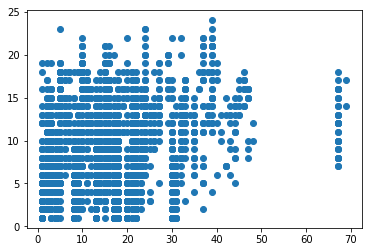

In [652]:
plt.scatter(data.driverId, data.position)

In [653]:
data.head


<bound method NDFrame.head of        raceId  driverId  position  positionOrder  points  laps  fastestLap  \
0          18         1       1.0              1    10.0    58        39.0   
1          18         2       2.0              2     8.0    58        41.0   
2          18         3       3.0              3     6.0    58        41.0   
3          18         4       4.0              4     5.0    58        58.0   
4          18         5       5.0              5     4.0    58        43.0   
...       ...       ...       ...            ...     ...   ...         ...   
22109     899         3       5.0              5    10.0    71        60.0   
22111     899        13       7.0              7     6.0    71        49.0   
22113     899         1       9.0              9     2.0    71        51.0   
22117     899        16      13.0             13     0.0    70        57.0   
22118     899         5      14.0             14     0.0    70        70.0   

      fastestLapSpeed  
0        

In [654]:
#X_train, X_test, y_train, y_test = train_test_split(data.driverId, data.position)
X_train, X_test, y_train, y_test = train_test_split(data.driverId, data.position, test_size=0.10)

In [655]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [656]:
X_test

array([[ 3],
       [ 4],
       [13],
       [ 3],
       [23],
       [16],
       [39],
       [ 3],
       [14],
       [29],
       [ 1],
       [21],
       [19],
       [ 9],
       [22],
       [ 8],
       [16],
       [14],
       [ 1],
       [20],
       [18],
       [16],
       [37],
       [22],
       [39],
       [13],
       [20],
       [ 4],
       [22],
       [13],
       [23],
       [ 3],
       [17],
       [ 4],
       [ 5],
       [39],
       [17],
       [ 5],
       [67],
       [32],
       [13],
       [13],
       [ 2],
       [24],
       [ 3],
       [ 1],
       [ 5],
       [13],
       [ 8],
       [23],
       [ 2],
       [ 3],
       [18],
       [ 8],
       [ 4],
       [11],
       [19],
       [14],
       [ 9],
       [ 4],
       [22],
       [18],
       [10],
       [13],
       [22],
       [15],
       [67],
       [26],
       [32],
       [ 2],
       [26],
       [30],
       [ 3],
       [ 8],
       [32],
       [ 3],
       [ 3],

In [657]:
lrmodel = LogisticRegression()

In [658]:
lrmodel.fit(X_train, y_train)

/Users/rickmc/Library/Python/3.5/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# List of Top 20 F1 Racers, ranked 
1 United Kingdom Lewis Hamilton	250	84	39	28	151	88	47	3431
2	Germany Sebastian Vettel	240	53	35	32	120	57	38	2985
3	Spain Fernando Alonso	311	32	37	28	97	22	23	1899
4	Finland Kimi Räikkönen	313	21	37	45	103	18	46	1854
5	Germany Nico Rosberg	206	23	25	9	57	30	20	1594.5
6	Germany Michael Schumacher	307	91	43	21	155	68	77	1566
7	Finland Valtteri Bottas	139	7	22	16	45	11	13	1289
8	United Kingdom Jenson Button	306	15	15	20	50	8	8	1235
9	Brazil Felipe Massa	269	11	13	17	41	16	15	1167
10	Australia Mark Webber	215	9	16	17	42	13	19	1047.5
11	Australia Daniel Ricciardo	171	7	6	16	29	3	13	1040
12	Netherlands Max Verstappen	102	8	11	12	31	2	7	948
13	France Alain Prost	199	51	35	20	106	33	41	798.5
14	Brazil Rubens Barrichello	322	11	29	28	68	14	17	658
15	Brazil Ayrton Senna	161	41	23	16	80	65	19	614
16	Mexico Sergio Pérez	176	0	2	6	8	0	4	580
17	United Kingdom David Coulthard	246	13	26	23	62	12	18	535
18	Germany Nico Hülkenberg	178	0	0	0	0	1	2	511
19	Brazil Nelson Piquet	204	23	20	17	60	24	23	485.5
20	United Kingdom Nigel Mansell	188	31	17	11	59	32	30	482

List of Drivers by driverId

1	Lewis	Hamilton
2	Nick	Heidfeld
3	Nico	Rosberg
4	Fernando	Alonso
5	Heikki	Kovalainen
6	Kazuki	Nakajima
7	S̩bastien Bourdais
8	Kimi	Raikk̦onen
9	Robert	Kubica
10	Timo	Glock
11	Takuma	Sato
12	Nelson	Piquet Jr.
13	Felipe	Massa
14	David	Coulthard
15	Jarno	Trulli
16	Adrian	Sutil
17	Mark	Webber
18	Jenson	Button
19	Anthony	Davidson
20	Sebastian	Vettel
21	Giancarlo	Fisichella
22	Rubens	Barrichello
23	Ralf	Schumacher
24	Vitantonio	Liuzzi
25	Alexander	Wurz

In [659]:
lrmodel.score(X_test,y_test)

0.04743083003952569

In [660]:
lrmodel.predict_proba(X_test)

array([[0.0827909 , 0.09525533, 0.0971764 , ..., 0.00379917, 0.0056381 ,
        0.00592258],
       [0.08220101, 0.0926919 , 0.09482276, ..., 0.00386934, 0.00550031,
        0.00521459],
       [0.07511569, 0.07066701, 0.0741107 , ..., 0.004446  , 0.00429015,
        0.00161586],
       ...,
       [0.08220101, 0.0926919 , 0.09482276, ..., 0.00386934, 0.00550031,
        0.00521459],
       [0.06784028, 0.05543439, 0.05927047, ..., 0.00479842, 0.00342566,
        0.00062931],
       [0.06784028, 0.05543439, 0.05927047, ..., 0.00479842, 0.00342566,
        0.00062931]])

In [661]:
lrmodel.predict([[15]])

array([4.])

In [662]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [663]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [664]:
knn.score(X_test,y_test)

0.35799691583644166

In [665]:
knn.predict([[1]])

array([5.4])

In [666]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=20, random_state=0)
rforest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [667]:
rforest.score(X_test,y_test)

0.4425514264470067

In [648]:
rforest.predict([[8]])

array([4.5255636])